<a href="https://colab.research.google.com/github/Agiacobino/Proyecto-DS2/blob/main/Proyecto_Agostina_Giacobino_preentrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto: Apiarios Centinela

##Abstract

##### Las abejas meliferas son productoras de miel y una de las principales especies de polinizadores en el mundo. La principal amenaza sanitaria es la presencia del acaro *Varroa destructor*. El presente proyecto tiene como objetivo predecir los niveles de Varroa en la provincia de Santa Fe en funcion de factores intrinsecos de las colmenas de abejas y extrinsecos relacionados con la zona y el manejo productivo que se hace en las mismas. Se registran variables geograficas y de manejo de las colmenas por parte de los productores para integrar todos los potenciales drivers o factores que intervienen en su dinamica a lo largo del año.

####Importar las librerias necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


####Configuración del entorno de Python en Google Colab

In [ ]:
# importar el dataset desde google drive
from google.colab import drive

drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd
%cd /content/drive/MyDrive/Colab_Notebooks/Proyecto/

/content/drive/MyDrive/Colab_Notebooks/Proyecto


In [ ]:
# lectura del archivo excel
centinela=pd.read_excel('Centinelas.xlsx')
centinela


,Año,Apiario,ID,Periodo,Fecha de muestreo,Zona,VF,CCA,CCC,CCM,...,Tratamiento otoño,Suplemento E,Bloqueo,Bloque como,Bloqueo activo,"Apiarios 1,5 km",Cuantos,Producción,Aplicaciones,Mortalidad
0,2017,Escalada,7,Pre,2017-03-02,Centro,26.106195,8,6,2,...,Oxálico,JA,No,No,No,No,0.0,NaN,NaN,NaN
1,2017,Escalada,7,Pre,2017-03-02,Centro,18.784530,8,7,1,...,Oxálico,JA,No,No,No,No,0.0,NaN,NaN,NaN
2,2017,Escalada,7,Pre,2017-03-02,Centro,2.136752,7,5,2,...,Oxálico,JA,No,No,No,No,0.0,NaN,NaN,NaN
3,2017,Escalada,7,Pre,2017-03-02,Centro,3.401361,7,5,2,...,Oxálico,JA,No,No,No,No,0.0,NaN,NaN,NaN
4,2017,Escalada,7,Pre,2017-03-02,Centro,7.377049,9,6,2,...,Oxálico,JA,No,No,No,No,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,2023,Molino,46,IT,2023-08-14,Sur,0.000000,8.5,3,3,...,Amitraz,NaN,Natural,Natural,No,No,0.0,15.0,Mayores,NaN
2335,2023,Molino,46,IT,2023-08-14,Sur,0.000000,9,2,6,...,Amitraz,NaN,Natural,Natural,No,No,0.0,15.0,Mayores,NaN
2336,2023,Molino,46,IT,2023-08-14,Sur,0.000000,9,2.5,5,...,Amitraz,NaN,Natural,Natural,No,No,0.0,15.0,Mayores,NaN
2337,2023,Molino,46,IT,2023-08-14,Sur,0.000000,8,4,1,...,Amitraz,NaN,Natural,Natural,No,No,0.0,15.0,Mayores,NaN


##Breve descripcion del Dataset




#####Para el proyecto final se utilizará una base de datos generada por el proyecto Apiarios Centinela llevado a cabo por un grupo de investigación del Instituto de Investigación de la Cadena Láctea (INTA-CONICET). El mismo consiste en el monitoreo de colmenas productoras de miel en distintas zonas de la provincia de Santa Fe para registrar distintos parámetros del estado general y sanitario de las mismas, así como prácticas de control y alimentación de las abejas. Los monitoreos se realizan tres veces por año en 6 colmenas de cada apiario participante desde el año 2017. La base de datos utilizada comprende los tres monitoreos anuales desde 2017 hasta 2023.

## Descripcion de las Variables incluidas en el data set:
#####**Año:** el año de monitoreo correspondiente, la variable incluye los años entre 2017 y 2023.  
#####**Apiario:** Nombre del establecimiento visitado
#####**ID**:numero asignado para cada apiario que se incluye en el sistema de monitoreo. Como algunos se sumaron en años posteriores o los iniciales abandonaron el proyecto en el algún momento, no todos los ID tienen datos para todos los años.
#####**Período:** cada momento de monitoreo dentro de cada año. La variable admite tres categorías: PRE (monitoreo previo al tratamiento sanitario de otoño), Post (monitoreo posterior al tratamiento sanitario de otoño) e IT (Inicio de temporada que corresponde al monitoreo de primavera).
#####**Fecha de muestreo:** registro del día de visita al apiario en cada momento de monitoreo. Para el caso de pre-tratamiento la fecha también corresponde a la fecha en que se aplico el tratamiento acaricida en otoño.
#####**Zona:** Las colmenas monitoreadas estas distribuidas en distintas zonas de la provincia. La variable incluye cuatro zonas: Norte, Centro, Sur y Costa.
#####**VF**: Porcentaje de infestación con Varroa destructor, que es la principal amenaza sanitaria en las colmenas que producen miel.  En cada visita se toma una muestra de 300 abejas por colmena que se lleva al laboratorio para establecer el nivel de infestación.
#####**CCA** ( # cuadros con abejas): para cada colmena en cada visita se establece el numero de cuadros que presentan abejas adultas en ambos lados. Considerando que una colmena estándar tiene 10 cuadros, la variable puede tomar valores entre 1 y 10 cuadros por colmena.
#####**CCC** ( # cuadros con cría) : para cada colmena en cada visita se establece el número de cuadros que presentan cría de abejas en la superficie de ambos lados. Considerando que una colmena estándar tiene 10 cuadros, la variable puede tomar valores entre 1 y 10 cuadros por colmena.
#####**CCM** ( # cuadros con miel): para cada colmena en cada visita se establece el número de cuadros que presentan miel almacenada en la superficie de ambos lados. Considerando que una colmena estándar tiene 10 cuadros, la variable puede tomar valores entre 1 y 10 cuadros por colmena.
#####**CCP**(# cuadros con polen): para cada colmena en cada visita se establece el número de cuadros que presentan polen almacenado en la superficie de ambos lados. Considerando que una colmena estándar tiene 10 cuadros, la variable puede tomar valores entre 1 y 10 cuadros por colmena.
#####**Tratamiento otoño:** Indica que droga se utilizó en el tratamiento de otoño aplicado contra Varroa destructor. En el caso de no realizar el tratamiento se indica como No aplico.
#####**Suplemento E**: Indica el tipo de suplemento energético que se utilizó para alimentar a las colmenas en otoño. La variable incluye las siguientes opciones: Jarabe de azúcar (JA), Jarabe de maíz de Alta fructosa (JMAF), la indicación de haber alimentado pero no especificar el tipo ( Si) o la indicación de no haber aplicado ( No).  
#####**Bloqueo:** Indica si el apicultor prepara las colmenas para el invierno alimentando intensamente las colmenas hasta reducir el nido de cria. El bloqueo es una estrategia que no tiene parámetros completamente definidos y al mismo tiempo es una condición que las colmenas pueden alcanzar sin intervención dependiendo del ambiente, entonces de acuerdo con la interpretación que cada apicultor la respuesta obtenida a la consulta si realizar el bloqueo puede ser: Si, No o Natural.
#####**Bloqueo como**: esta variable identifica que acción realizó el apicultor para lograr el bloqueo en las colmenas. Esta variable incluye las siguientes categorías: No (no realizo ninguna acción), Natural (no realizó ninguna acción, pero considera que las colmenas fueron bloqueadas de manera natural), JMAF (utilizó el jarabe de maíz de alta fructosa pero no indicó frecuencia), 2*JMAF o 3*JMAF (utilizó el jarabe de maíz de alta fructosa en 2 o 3 visitas espaciadas por 4 días), JA (utilizó el jarabe de azúcar pero no indicó frecuencia), 3* JA (utilizó el jarabe de azúcar en  3 visitas espaciadas por 4 días), JA2*1 (utilizó el jarabe de azúcar  en concentración 2 a 1, pero no indicó frecuencia).
#####**Bloqueo activo:** esta variable se define a posteriori e intenta identificar si el apicultor realizó una acción o más para lograr el bloqueo en las colmenas de acuerdo con las otras respuestas. Esta variable solo admite Si o No.
**Apiarios 1,5 km:** esta variable determina, según el conocimiento del apicultor, si hay apiarios propios o de otros productores establecidos a 1,5 km de distancia o menos.
#####**Cuantos:** en el caso de responder positivamente la consulta anterior, determinar cuántos apiarios están en el radio de 1.5 km alrededor.
**Producción:** esta variable indica la cantidad promedio en Kg de miel producida por cada colmena del apiario durante el año de consulta.
#####**Aplicaciones:** esta variable indica según la percepción del apicultor si las aplicaciones de insecticidas, fungicidas o herbicidas aplicados en los alrededores del apiario durante el año de la consulta fueron mayores o menores a las percibidas como normales o esperadas. La variable puede asumir las siguientes categorías: Normales, Mayores, Menores, No sabe o No se aplica.
#####**Mortalidad:** esta variable indica la proporción en porcentaje de colmenas que se perdieron durante el invierno del año de la consulta.


## Hipótesis y objetivo

#####El presente proyecto tiene como objetivo predecir los niveles de Varroa Foretica (VF) en funcion factores relacionados a la zona, el momento del año (periodo), los tratamientos sanitarios, el manejo nutricional o bloqueo y los niveles de abejas y cria presentes en las colmenas.

#####La hipótesis que sustenta el diseño del análisis para el presente proyecto es:
#####La condición sanitaria y el tamaño de las colmenas están determinados por múltiples factores que incluyen: condiciones ambientales determinadas por el año, la zona o el impacto de prácticas externas a la apicultura como por factores internos relacionados con el manejo sanitario y nutricional que realiza el apicultor en momentos clave de la producción. Sin embargo, es posible que algunas variables impacten relativamente más sobre sobre un fenómeno multifactorial que otras o en distintos momentos del año. Conocer el impacto relativo permitirá en segunda instancia realizar ajustes sobre las prácticas de manejo aplicadas en los apiarios o mitigar el impacto de potenciales cambios en los factores externos.


In [ ]:
#Estructura de los datos: numero de filas, nombre de las columnas y tipo de dato para cada factor.
centinela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Año                2339 non-null   int64         
 1   Apiario            2339 non-null   object        
 2   ID                 2339 non-null   int64         
 3   Periodo            2339 non-null   object        
 4   Fecha de muestreo  2339 non-null   datetime64[ns]
 5   Zona               2339 non-null   object        
 6   VF                 2267 non-null   float64       
 7   CCA                2092 non-null   object        
 8   CCC                2079 non-null   object        
 9   CCM                2070 non-null   object        
 10  CCP                1899 non-null   object        
 11  Tratamiento otoño  2339 non-null   object        
 12  Suplemento E       2286 non-null   object        
 13  Bloqueo            2202 non-null   object        
 14  Bloque c

#### Modificaciones en el data set: tipo de datos en las columnas y nombres de variables.

In [ ]:
#Cuadros con abejas, cria, miel y polen se cambian a tipo de datos numericos.

centinela['CCA'] = pd.to_numeric(centinela['CCA'], 'coerce')
centinela['CCC'] = pd.to_numeric(centinela['CCC'], 'coerce')
centinela['CCM'] = pd.to_numeric(centinela['CCM'], 'coerce')
centinela['CCP'] = pd.to_numeric(centinela['CCP'], 'coerce')
centinela['Cuantos'] = pd.to_numeric(centinela['Cuantos'], 'coerce')

In [ ]:
# Listado de las variables en el dataset
list(centinela.columns.values.tolist())

['Año ',
 'Apiario',
 'ID',
 'Periodo',
 'Fecha de muestreo',
 'Zona ',
 'VF ',
 'CCA',
 'CCC',
 'CCM',
 'CCP',
 'Tratamiento otoño',
 'Suplemento E',
 'Bloqueo ',
 'Bloque como',
 'Bloqueo activo',
 'Apiarios 1,5 km',
 'Cuantos',
 'Producción',
 'Aplicaciones',
 'Mortalidad']

In [ ]:
#Se renombran las variables que necesitan ser corregidas.
centinela.rename(columns = {'Año ':'Año'},
                 inplace = True)

In [ ]:
centinela.rename(columns = {'Zona ':'Zona'},
                 inplace = True)

In [ ]:
centinela['Zona']=centinela['Zona'].str.upper()

In [ ]:
centinela.rename(columns = {'VF ':'VF'},
                 inplace = True)

In [ ]:
centinela.rename(columns = {'Bloqueo ':'Bloqueo'},
                 inplace = True)

In [ ]:
centinela.rename(columns = {'Bloque como':'Bloqueo como'},
                 inplace = True)

In [ ]:
# se corrijen los nombres de las categorias en variables de tipo string
#corregir los nombres de las categorias tratamiento de otoño, se escriben todas en mayuscula.
centinela['Tratamiento otoño']=centinela['Tratamiento otoño'].str.upper()

In [ ]:
#Se ajustan los nombres de las categorias en la variable Tratamiento otoño.
centinela['Tratamiento otoño'] = centinela['Tratamiento otoño'].str.strip()

In [ ]:
centinela['Tratamiento otoño']=centinela['Tratamiento otoño'].astype('category')

In [ ]:
centinela['Tratamiento otoño'].cat.categories

Index(['AMITRAZ', 'AMITRAZ CASERO', 'FLUMETRINA', 'FLUMETRINA CASERA',
       'FLUMETRINA+CASERO', 'FLUMETRINA+OXA', 'NO APLICO', 'OXALICO CASERO',
       'OXALICO EN TIRAS', 'OXÁLICO', 'TIMOL'],
      dtype='object')

In [ ]:
# se chequea el numero de respuestas por tratamiento.
trat = centinela.groupby(['Tratamiento otoño'])['Tratamiento otoño'].count()
trat

<ipython-input-19-cc8c40973e57>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trat = centinela.groupby(['Tratamiento otoño'])['Tratamiento otoño'].count()


,Tratamiento otoño
Tratamiento otoño,
AMITRAZ,958
AMITRAZ CASERO,192
FLUMETRINA,850
FLUMETRINA CASERA,6
FLUMETRINA+CASERO,18
FLUMETRINA+OXA,18
NO APLICO,12
OXALICO CASERO,18
OXALICO EN TIRAS,162


In [ ]:
#Se chequea los nombres de las categorias en la variable Periodo.
centinela['Periodo']=centinela['Periodo'].astype('category')


In [ ]:
## se chequea el numero de respuestas por Periodo.
per = centinela.groupby(['Periodo'])['Periodo'].count()
per

<ipython-input-21-5894cdbefc7a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per = centinela.groupby(['Periodo'])['Periodo'].count()


,Periodo
Periodo,
IT,800
Post,761
Pre,778


In [ ]:
## corregir los nombres de las categorias de apiarios a 1,5 km, se escriben todas en mayuscula.
centinela['Apiarios 1,5 km']=centinela['Apiarios 1,5 km'].str.upper()

In [ ]:
## corregir los nombres de las categorias de las Aplicaciones, se escriben todas en mayuscula.
centinela['Aplicaciones']=centinela['Aplicaciones'].str.upper()

In [ ]:
#Chequear que se hayan modificado los nombres de las variables.
list(centinela.columns.values.tolist())

['Año',
 'Apiario',
 'ID',
 'Periodo',
 'Fecha de muestreo',
 'Zona',
 'VF',
 'CCA',
 'CCC',
 'CCM',
 'CCP',
 'Tratamiento otoño',
 'Suplemento E',
 'Bloqueo',
 'Bloqueo como',
 'Bloqueo activo',
 'Apiarios 1,5 km',
 'Cuantos',
 'Producción',
 'Aplicaciones',
 'Mortalidad']

#### Análisis inicial del dataset

In [ ]:
centinela.shape

(2339, 21)

In [ ]:
centinela.head()

,Año,Apiario,ID,Periodo,Fecha de muestreo,Zona,VF,CCA,CCC,CCM,...,Tratamiento otoño,Suplemento E,Bloqueo,Bloqueo como,Bloqueo activo,"Apiarios 1,5 km",Cuantos,Producción,Aplicaciones,Mortalidad
0,2017,Escalada,7,Pre,2017-03-02,CENTRO,26.106195,8.0,6.0,2.0,...,OXÁLICO,JA,No,No,No,NO,0.0,NaN,NaN,NaN
1,2017,Escalada,7,Pre,2017-03-02,CENTRO,18.784530,8.0,7.0,1.0,...,OXÁLICO,JA,No,No,No,NO,0.0,NaN,NaN,NaN
2,2017,Escalada,7,Pre,2017-03-02,CENTRO,2.136752,7.0,5.0,2.0,...,OXÁLICO,JA,No,No,No,NO,0.0,NaN,NaN,NaN
3,2017,Escalada,7,Pre,2017-03-02,CENTRO,3.401361,7.0,5.0,2.0,...,OXÁLICO,JA,No,No,No,NO,0.0,NaN,NaN,NaN
4,2017,Escalada,7,Pre,2017-03-02,CENTRO,7.377049,9.0,6.0,2.0,...,OXÁLICO,JA,No,No,No,NO,0.0,NaN,NaN,NaN


In [ ]:
# Se describen las variables cuantitativas usando los parametros estadisticos descriptivos clasicos.
centinela.describe().T

,count,mean,min,25%,50%,75%,max,std
Año,2339.0,2020.408294,2017.0,2019.0,2021.0,2022.0,2023.0,2.082872
ID,2339.0,19.082941,1.0,10.0,16.0,28.0,47.0,10.983344
Fecha de muestreo,2339,2020-10-28 18:33:42.402736128,2017-02-02 00:00:00,2018-10-19 00:00:00,2021-03-30 00:00:00,2022-09-06 00:00:00,2023-10-12 00:00:00,NaN
VF,2267.0,1.837255,0.0,0.0,0.0,1.515152,48.3,4.347433
CCA,2091.0,7.649211,0.0,6.0,8.0,9.0,10.0,2.005667
CCC,2074.0,2.92271,0.0,1.0,3.0,4.0,9.0,2.085597
CCM,2056.0,2.839421,0.0,1.5,3.0,4.0,9.0,1.804613
CCP,1870.0,0.461283,0.0,0.1,0.3,0.5,8.0,0.619963
Cuantos,1615.0,1.365944,0.0,1.0,1.0,2.0,5.0,0.845839
Producción,1595.0,24.343335,0.0,15.0,23.0,30.0,70.0,12.448895


In [ ]:
# Se utiliza el metodo describe en variables cualitatitativas para obtener informacion general de este tipo de variables.
centinela .describe(include=['object']).T


,count,unique,top,freq
Apiario,2339,49,Cayasta,126
Zona,2339,4,CENTRO,857
Suplemento E,2286,5,JA,1788
Bloqueo,2202,3,Si,1585
Bloqueo como,2172,8,JA2*1,612
Bloqueo activo,2226,2,Si,1446
"Apiarios 1,5 km",2243,3,SI,1471
Aplicaciones,1595,5,NORMALES,966


####Limpieza y transformación de datos

#### Manejo de Valores perdidos

In [ ]:
centinela.isnull().sum()

,0
Año,0
Apiario,0
ID,0
Periodo,0
Fecha de muestreo,0
Zona,0
VF,72
CCA,248
CCC,265
CCM,283


In [ ]:
# Rellenar valores faltantes en CCC con la mediana
centinela['CCC'].fillna(centinela['CCC'].median(), inplace=True)

<ipython-input-30-c60981ed4542>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['CCC'].fillna(centinela['CCC'].median(), inplace=True)


In [ ]:
# Rellenar valores faltantes en CCA con la mediana
centinela['CCA'].fillna(centinela['CCA'].median(), inplace=True)

<ipython-input-31-5178ac6557a0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['CCA'].fillna(centinela['CCA'].median(), inplace=True)


In [ ]:
# Rellenar valores faltantes en CCP con la mediana
centinela['CCP'].fillna(centinela['CCP'].median(), inplace=True)

<ipython-input-32-dbfe63e5ea03>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['CCP'].fillna(centinela['CCP'].median(), inplace=True)


In [ ]:
# Rellenar valores faltantes en CCM con la mediana
centinela['CCM'].fillna(centinela['CCM'].median(), inplace=True)

<ipython-input-33-abb765c5bdb7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['CCM'].fillna(centinela['CCM'].median(), inplace=True)


In [ ]:
# Rellenar valores faltantes en VF con la mediana
centinela['VF'].fillna(centinela['VF'].median(), inplace=True)

<ipython-input-34-85b84b8d0658>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['VF'].fillna(centinela['VF'].median(), inplace=True)


In [ ]:
# Rellenar valores faltantes en Suplemento E con la moda
centinela['Suplemento E'].fillna('Sin respuesta', inplace=True)

<ipython-input-35-83987a0b2201>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Suplemento E'].fillna('Sin respuesta', inplace=True)


In [ ]:
# Rellenar valores faltantes en Bloqueo con la moda
centinela['Bloqueo'].fillna('Sin respuesta', inplace=True)

<ipython-input-36-5dcb6618f7e6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Bloqueo'].fillna('Sin respuesta', inplace=True)


In [ ]:
# Rellenar valores faltantes en Bloqueo como con la moda
centinela['Bloqueo como'].fillna('Sin respuesta', inplace=True)

<ipython-input-37-7cdb27f0e439>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Bloqueo como'].fillna('Sin respuesta', inplace=True)


In [ ]:
# Rellenar valores faltantes en Bloqueo activo con la moda
centinela['Bloqueo activo'].fillna('Sin respuesta', inplace=True)

<ipython-input-38-5f810aed711d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Bloqueo activo'].fillna('Sin respuesta', inplace=True)


In [ ]:
# Rellenar valores faltantes en Apiarios 1,5 km con la moda
centinela['Apiarios 1,5 km'].fillna('Sin respuesta', inplace=True)

<ipython-input-39-7eabb581d466>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Apiarios 1,5 km'].fillna('Sin respuesta', inplace=True)


In [ ]:
# Rellenar valores faltantes en Cuantos con la mediana
centinela['Cuantos'].fillna(centinela['Cuantos'].median(), inplace=True)

<ipython-input-40-9a644b2c0eef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Cuantos'].fillna(centinela['Cuantos'].median(), inplace=True)


In [ ]:
# Rellenar valores faltantes en Producción con la mediana
centinela['Producción'].fillna(centinela['Producción'].median(), inplace=True)

<ipython-input-41-83e2f0701c27>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Producción'].fillna(centinela['Producción'].median(), inplace=True)


In [ ]:
# Rellenar valores faltantes en Aplicaciones con la moda
centinela['Aplicaciones'].fillna('Sin respuesta', inplace=True)

<ipython-input-42-4926e4493d35>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Aplicaciones'].fillna('Sin respuesta', inplace=True)


In [ ]:
# Rellenar valores faltantes en Mortalidad con la mediana
centinela['Mortalidad'].fillna(centinela['Mortalidad'].median(), inplace=True)

<ipython-input-43-5d525715d9df>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  centinela['Mortalidad'].fillna(centinela['Mortalidad'].median(), inplace=True)


In [ ]:
# Chequeo de valores reemplazados
centinela.isnull().sum()

,0
Año,0
Apiario,0
ID,0
Periodo,0
Fecha de muestreo,0
Zona,0
VF,0
CCA,0
CCC,0
CCM,0


#### Identificacion de valores outliers


In [ ]:
from scipy.stats import zscore

In [ ]:
z_scores = zscore(centinela['VF'])
abs_z_scores = np.abs(z_scores)

In [ ]:
outliersvf = centinela[abs_z_scores > 3]
outliersvf.head()

,Año,Apiario,ID,Periodo,Fecha de muestreo,Zona,VF,CCA,CCC,CCM,...,Tratamiento otoño,Suplemento E,Bloqueo,Bloqueo como,Bloqueo activo,"Apiarios 1,5 km",Cuantos,Producción,Aplicaciones,Mortalidad
0,2017,Escalada,7,Pre,2017-03-02,CENTRO,26.106195,8.0,6.0,2.0,...,OXÁLICO,JA,No,No,No,NO,0.0,23.0,Sin respuesta,10.0
1,2017,Escalada,7,Pre,2017-03-02,CENTRO,18.784530,8.0,7.0,1.0,...,OXÁLICO,JA,No,No,No,NO,0.0,23.0,Sin respuesta,10.0
14,2017,Lehmann,8,Pre,2017-03-10,CENTRO,22.510000,8.0,6.0,2.0,...,FLUMETRINA,JA,Si,JA2*1,Si,NO,0.0,23.0,Sin respuesta,10.0
32,2017,Cayasta,10,Pre,2017-03-23,COSTA,15.510000,9.0,5.0,2.0,...,FLUMETRINA,JA,Si,JA,Si,NO,1.0,23.0,Sin respuesta,10.0
45,2017,La Palmira 1,11,Pre,2017-03-28,NORTE,15.454545,10.0,3.0,2.0,...,TIMOL,JA,Si,JA2*1,Si,SI,1.0,23.0,Sin respuesta,10.0


#### Los valores outliers detectados corresponden a colmenas con mucha infestacion pero que se encuentran dentro de los valores extremos de la distribucion.

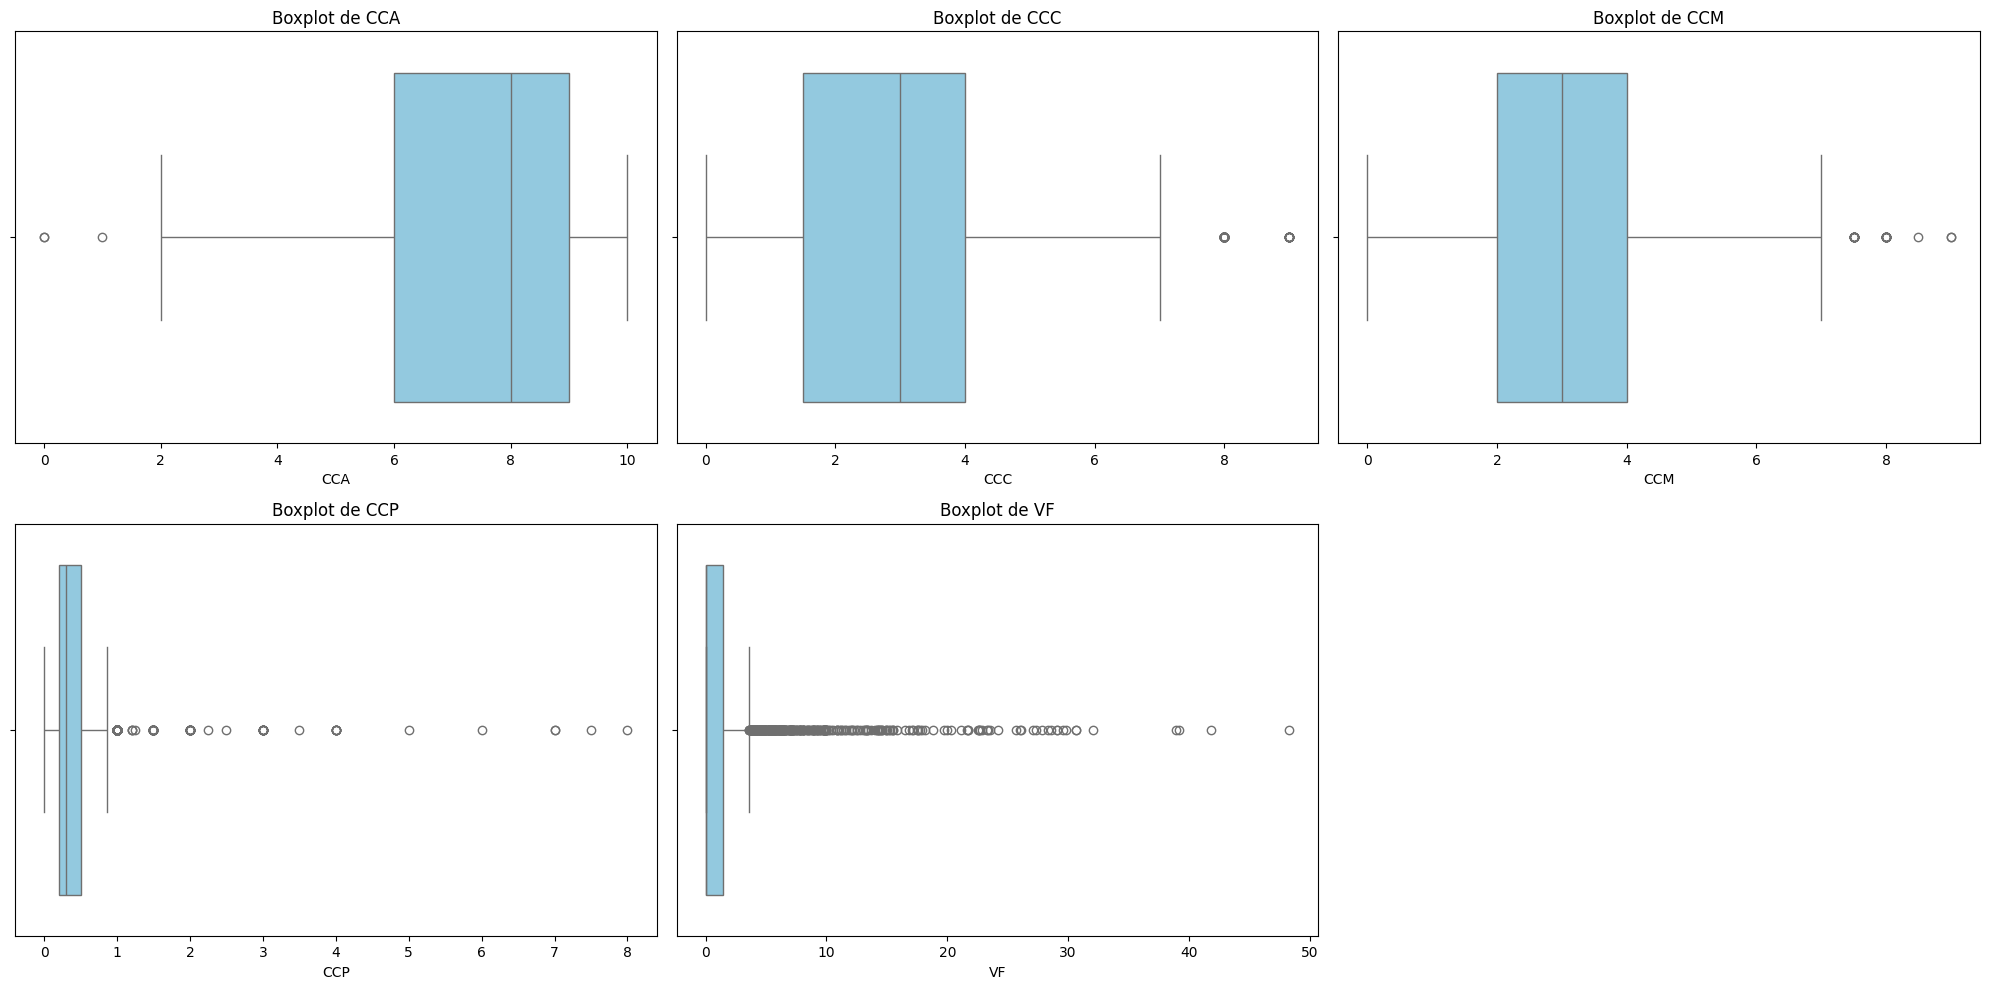

In [ ]:
explore_columns = centinela[['CCA', 'CCC', 'CCM','CCP', 'VF']]

# caracteristicas de los subgráficos
num_vars = len(explore_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Tamaño de la figura
plt.figure(figsize=(20, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(explore_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=centinela[col], color='skyblue')
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

### Analisis exploratorio de los datos



#### Se definen paleta de colores y estilo para los graficos

In [ ]:
sns.palettes.SEABORN_PALETTES.keys()

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])

In [ ]:
sns.color_palette(palette="pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [ ]:
sns.set_theme(style="whitegrid")

In [ ]:
#Valores promedio y la dispersion de los datos para la varible de respuesta principal que es el porcentaje de Varroa foretica en cada colmena.
centinela['VF'].describe()

,VF
count,2339.000000
mean,1.780700
std,4.291722
min,0.000000
25%,0.000000
50%,0.000000
75%,1.434549
max,48.300000


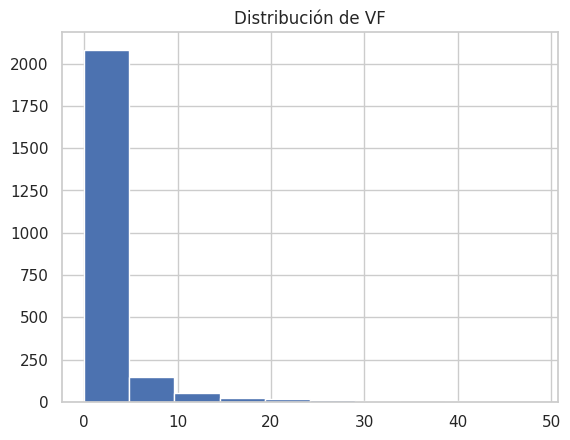

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(centinela['VF'])
plt.title('Distribución de VF')
plt.show()
plt.savefig("VF.jpg")

####  ZONA

In [ ]:
# numero de colmenas evaluadas en cada zona
centinela[["VF", "Zona"]].groupby("Zona").count()

,VF
Zona,
CENTRO,857
COSTA,270
NORTE,522
SUR,690


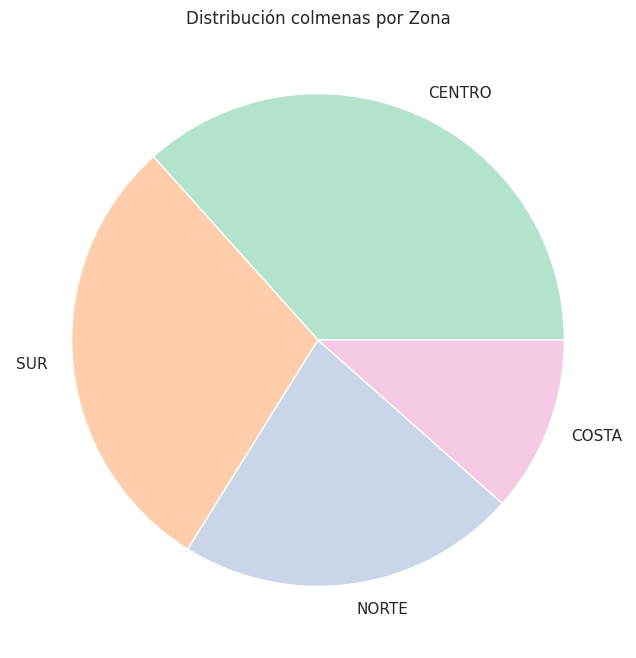

In [ ]:
#grafico univariado
zona = centinela['Zona'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(zona,colors=plt.cm.Pastel2.colors, labels=zona.index)

plt.title('Distribución colmenas por Zona')

plt.show()

In [ ]:
#Bivariado: promedio de VF por zona
centinela[["VF", "Zona"]].groupby("Zona").mean()

,VF
Zona,
CENTRO,1.770958
COSTA,1.682031
NORTE,1.895876
SUR,1.744277


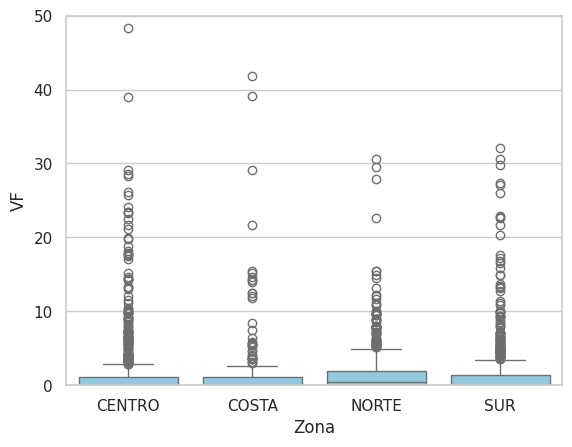

In [ ]:
#Grafico bivariado
plt.ylim([0,50])
ax = sns.boxplot(x="Zona", y="VF", data=centinela, color='skyblue')
plt.savefig("VF por Zona.jpg")

#### No se observa un efecto de la zona en los niveles de VF a lo largo del año. Sin embaergo esto puede deberse a que se estan analizandos los valores de VF en diferentes periodos.

#### PERIODO

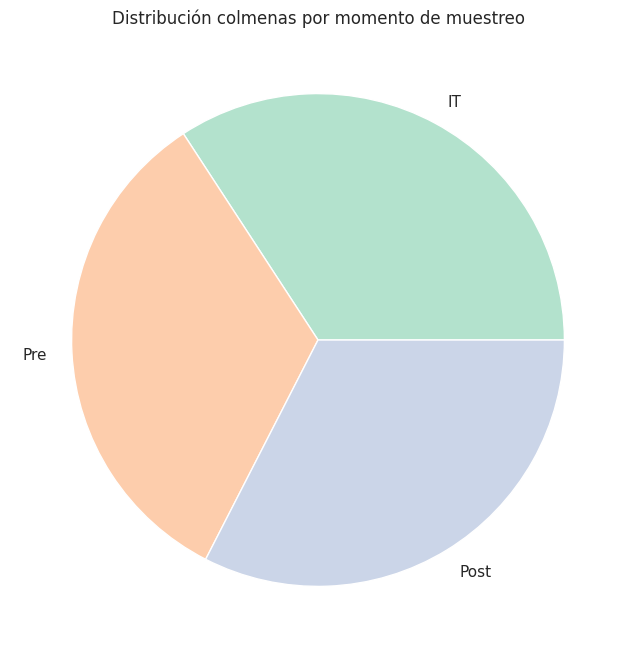

In [ ]:
#grafico univariado
periodo = centinela['Periodo'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(periodo,colors=plt.cm.Pastel2.colors, labels=periodo.index)

plt.title('Distribución colmenas por momento de muestreo')

plt.show()

In [ ]:
#Bivariado: promedio de VF por Periodo
centinela[["VF", "Periodo"]].groupby("Periodo").mean()

<ipython-input-59-c4602cee6fcc>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  centinela[["VF", "Periodo"]].groupby("Periodo").mean()


,VF
Periodo,
IT,0.628830
Post,0.341853
Pre,4.372550


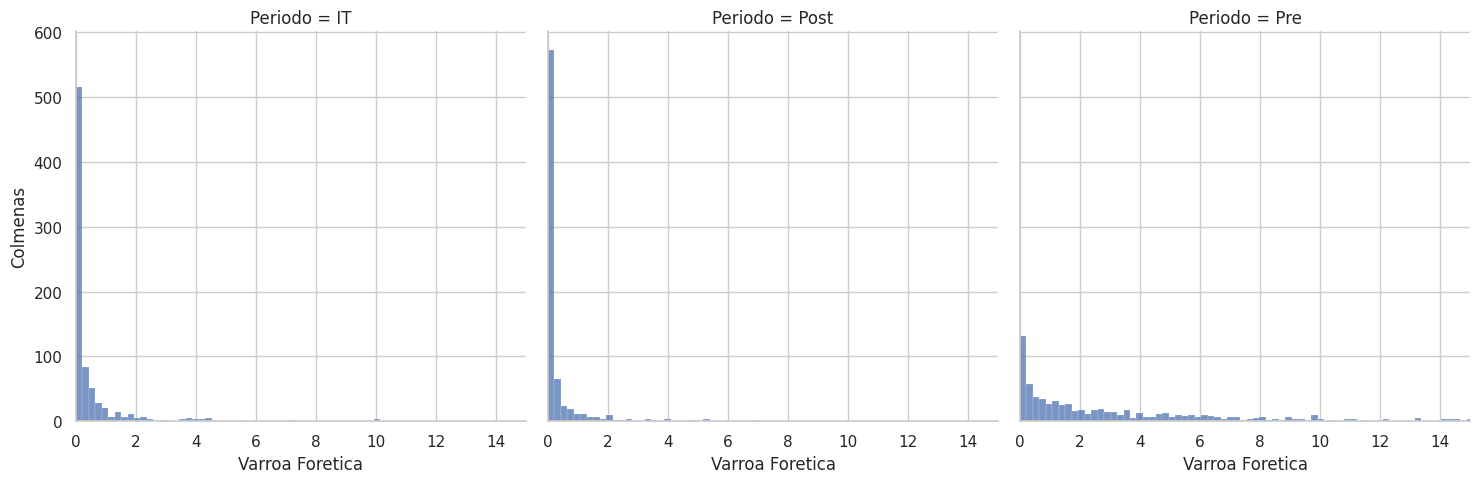

In [ ]:
#Grafico bivariado
ax=sns.displot(data=centinela, x="VF", col="Periodo")
ax.set(xlabel="Varroa Foretica", ylabel="Colmenas")
ax.set(xlim=(0, 15))
plt.savefig("VF por Periodo.jpg")


##### Se observa una clara diferencia en los valores de VF a los largo del año. Durante el periodo pre tratamiento hay menos proporcion de colemnas con valores iguales a 0. Es de esperar que luego de aplicar metodos de control, los niveles de VF sean menores en post tratamiento y en la primavera siguiente.

##### **NOTA PARA EL MODELADO** Se puede considerar ajustar un modelo para cada periodo, para ver si distintos factores explican los niveles observados en cada momento.

 #### ZONA * PERIODO

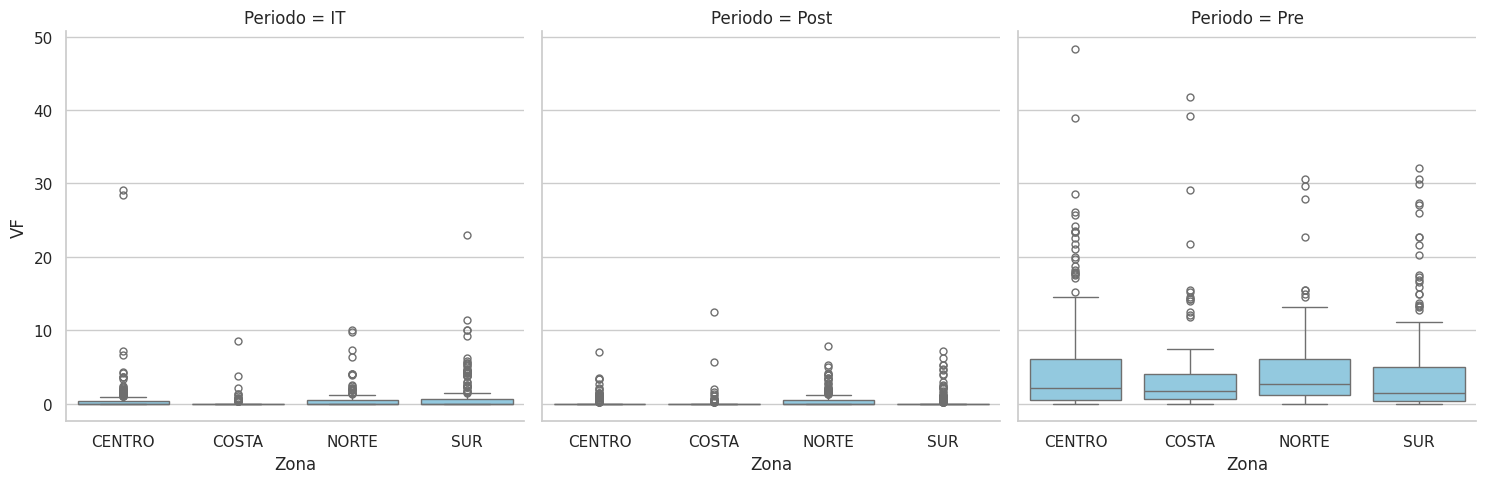

In [ ]:
sns.catplot(
    data=centinela, x='Zona', y='VF',
    col='Periodo', kind='box', col_wrap=3, color='skyblue')

##### Cuando observamos los niveles de VF por zona pero dividido por cada periodo de muestreo, se observa que los niveles varian entre zonas para el momento Pre-tratamiento.

#### NIVEL DE ABEJAS ADULTAS EN LAS COLMENAS
##### Esta variable es importante dado que colmenas con mayor poblacion de abejas adultas pueden ser mas resistente a la enfermedad causada por Varroa.

<Axes: xlabel='CCA', ylabel='VF'>

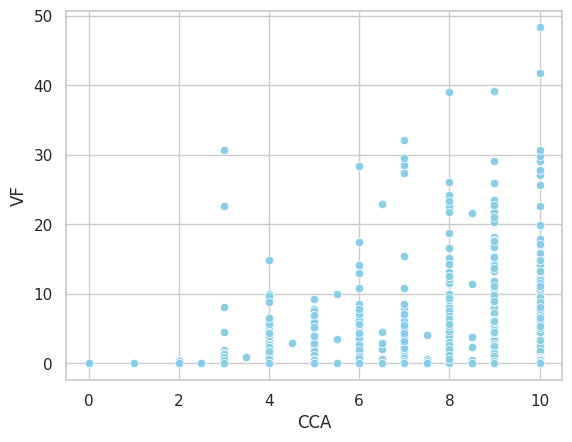

In [ ]:
# bivariado correlacion entre cantidad de abejas y VF
sns.scatterplot(data=centinela, x="CCA", y="VF", color='skyblue')

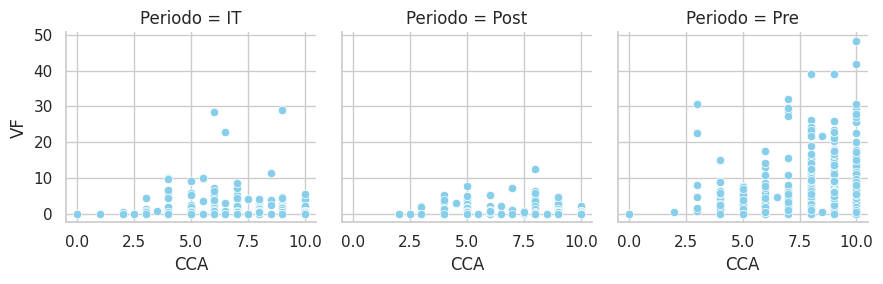

In [ ]:
g = sns.FacetGrid(centinela, col="Periodo")
g.map(sns.scatterplot, "CCA", "VF", color='skyblue')
plt.savefig("VF*CCA por Periodo.jpg")

#### Hay una correlacion positiva entre la cantidad de abejas y los niveles de VF que es mas evidente en el periodo Pre-Tratamiento.

#### NIVEL DE CRIA EN LAS COLMENAS
##### Esta variable es importante dado que la reproduccion de Varroa y por lo tanto su crecimiento poblacional depende de la cantidad de cria que haya en las colmenas.

<Axes: xlabel='CCC', ylabel='VF'>

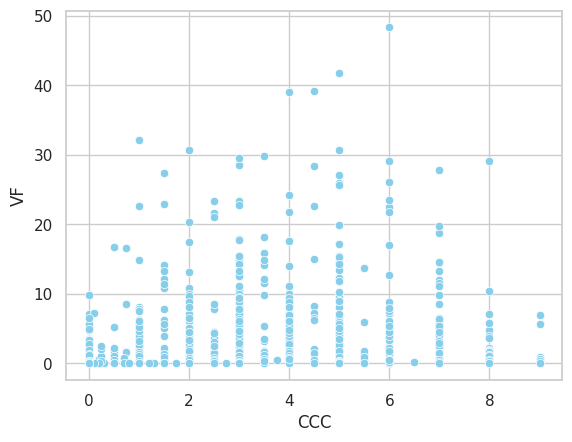

In [ ]:
# bivariado correlacion entre cantidad de cuadros de cria y VF
sns.scatterplot(data=centinela, x="CCC", y="VF", color='skyblue')

#### NIVEL DE CRIA *PERIODO

######  Luego el mismo grafico se realiza por periodo, dado que ambas variables fluctuan de manera estacional. Esta relacion es importante porque los niveles de VF estan asociados a una mayor disponibilidad de la cria de abejas y al mismo tiempo la variable CCC esta asociada al periodo.

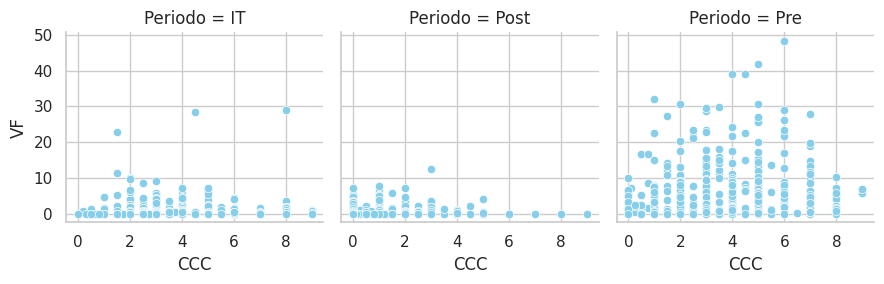

In [ ]:
g = sns.FacetGrid(centinela, col="Periodo")
g.map(sns.scatterplot, "CCC", "VF", color='skyblue')
plt.savefig("VF*CCC por Periodo.jpg")

In [ ]:
# chequear la correlacion entre las variables
print('Correlación spearman: ', centinela['VF'].corr(centinela['CCC'], method='spearman'))

Correlación spearman:  0.27761220641189527


##### No hay una clara relacion entre la cria y los niveles de VF. Se observa una tendencia a correlacion positiva en la etapa pre-Tratamiento. Por otro lado, se observa menores niveles de cria disponible en el postratamiento, ya que es durante el invierno, pero no hay una relacion lineal entre ambas variables.

##### Los cuadros con miel y con polen son sintomas de la salud que tienen las colmenas, por lo tanto no son considerados predictores. No se van a incluir en el modelo.

###Correlacion entre todas las variables cuantitativas

<Axes: >

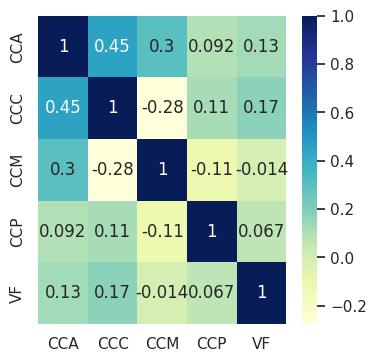

In [ ]:
plt.subplots(figsize=(4,4))
sns.heatmap(explore_columns.corr(numeric_only=True), cmap="YlGnBu", annot=True)

### No hay una buena correlacion entre las variables numericas ( CCA, CCC, CCP y CCM) y los niveles de VF. En particular, se hizo el analisis para CCA y CCC porque estan teoricamente relacionados con los niveles de VF

#### TRATAMIENTO

###### La siguiente variable para explorar luego de la zona, periodo y de la cantidad de cria, es el tipo de tratamiento aplicado para controlar los niveles del acaro a lo largo del año.

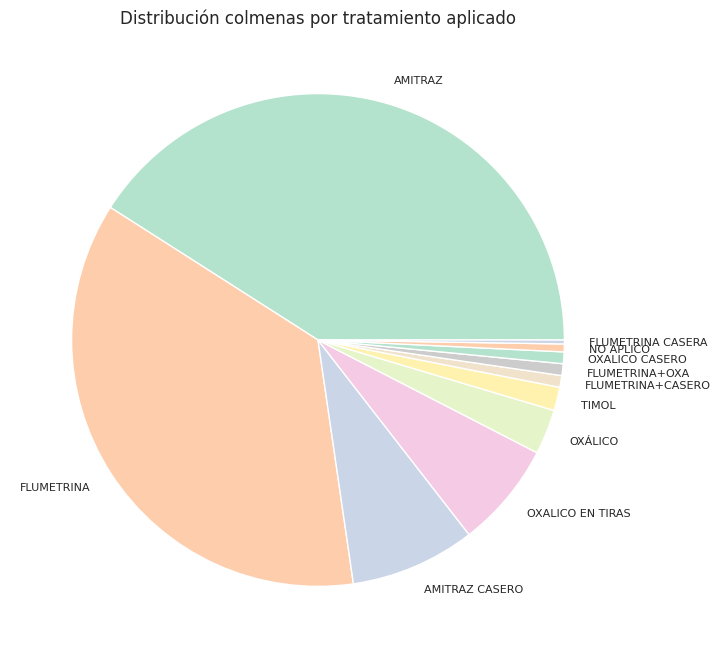

In [ ]:
#grafico univariado
tratamiento = centinela['Tratamiento otoño'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(tratamiento, colors=plt.cm.Pastel2.colors, labels=tratamiento.index, textprops={'fontsize': 8})

plt.title('Distribución colmenas por tratamiento aplicado')

plt.show()



In [ ]:
# subset de los datos solo por los niveles de VF postratamiento para ver el efecto de los distintos tratamientos aplicados.
# Por definicion el periodo postratamiento se mide cuando finalizan los mismos
post = centinela[(centinela['Periodo'] == "Post")]

In [ ]:
post[["VF", "Tratamiento otoño"]].groupby("Tratamiento otoño").mean()

<ipython-input-76-22b44c1dc715>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  post[["VF", "Tratamiento otoño"]].groupby("Tratamiento otoño").mean()


,VF
Tratamiento otoño,
AMITRAZ,0.277025
AMITRAZ CASERO,1.151539
FLUMETRINA,0.255209
FLUMETRINA CASERA,NaN
FLUMETRINA+CASERO,0.050352
FLUMETRINA+OXA,0.000000
NO APLICO,NaN
OXALICO CASERO,0.133690
OXALICO EN TIRAS,0.283297


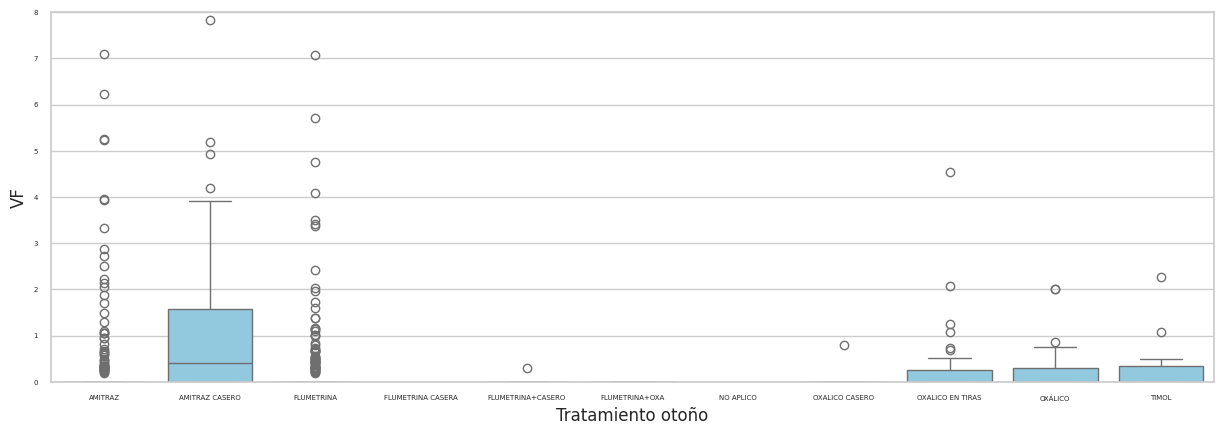

In [ ]:
#Grafico bivariado


plt.figure().set_figwidth(15)
plt.ylim([0,8])
ax = sns.boxplot(x="Tratamiento otoño", y="VF", data=post, color='skyblue')
ax.tick_params(axis='both',
               labelsize=5)
plt.savefig("VF por Tratamiento.jpg")

##### Los NaN para flumetrina casera y No aplico es porque no se registraron los valores de VF para el periodo pos-Tratamiento en esos casos.

#####**NOTA PARA EL MODELADO** se puede remover esas categorias si se hace un modelo especifico para el periodo pos-Tratamiento.

##### TRATAMIENTO * NIVELES DE CRIA

##### Por las mismas razones mencionadas anteriormente, se grafica la relacion entre cuadros con cria y VF pero en esta ocasion en funcion de los tratamientos aplicados. Esta relacion es importante porque los niveles de VF estan asociados a una mayor disponibilidad de la cria de abejas pero al mismo tiempo la eficacia de los productos aplicados puede variar en funcion de la cantiadad de cria disponible. La variable CCC esta asociada al periodo, como se vio en grafico de CCC vs VF por periodo. Es esperado que la etapa pre tenga mayores niveles de VF y CCC.

<Axes: xlabel='VF', ylabel='CCC'>

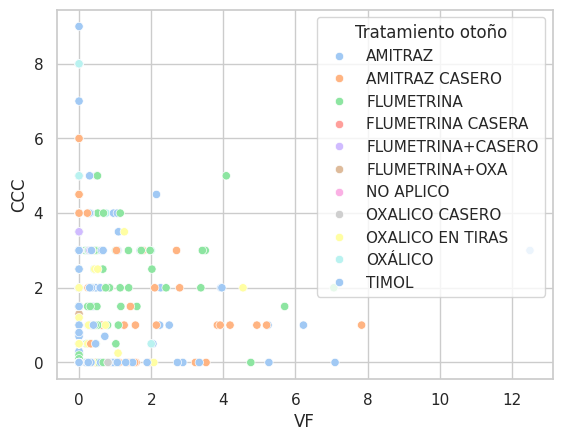

In [ ]:
sns.scatterplot(data=post, x="VF", y="CCC", hue="Tratamiento otoño", palette='pastel')


##### Cuando se grafica la relacion CCC y VF en funcion de los tratamientos no se observa un patron claro. Es decir no hay un tratamiento que haya sido aplicado con mayores niveles de cria o no hay diferentes eficacias ( VF cercana a 0) en funcion del tratamiento.

#### SUPLEMENTO E y BLOQUEO (varias variables)
##### Son variables relacionadas entre si, basadas en el tipo de alimentacion que se les provee a las colmenas. En los siguientes pasos se evaluara cual o cuales de esas variables serian las mas apropiadas para agregar al modelo. No se pueden agregar todas las variables porque explican aproximadamente lo mismo.

####SUPLEMENTO E

In [ ]:
#Grafico bivariado
plt.ylim([0,50])
ax = sns.boxplot(x="Suplemento E", y="VF", data=centinela, color='skyblue')

In [ ]:
# # numero de colmenas evaluadas por Suplemento Energetico. Ver cantidad de colmenas con categoria "sin respuesta".
centinela[["VF", "Suplemento E"]].groupby("Suplemento E").count()

#### BLOQUEO

In [ ]:
#Grafico bivariado
plt.ylim([0,50])
ax = sns.boxplot(x="Bloqueo", y="VF", data=centinela, color='skyblue')

In [ ]:
# numero de colmenas evaluadas por tipo de bloqueo. Ver cantidad de colmenas con categoria "sin respuesta".
centinela[["VF", "Bloqueo"]].groupby("Bloqueo").count()

#### BLOQUEO COMO

In [ ]:
#Grafico bivariado
plt.ylim([0,50])
ax = sns.boxplot(x="Bloqueo como", y="VF", data=centinela, color='skyblue')

In [ ]:
# numero de colmenas evaluadas por tipo de bloqueo como. Ver cantidad de colmenas con categoria "sin respuesta".
centinela[["VF", "Bloqueo como"]].groupby("Bloqueo como").count()

#### BLOQUEO ACTIVO

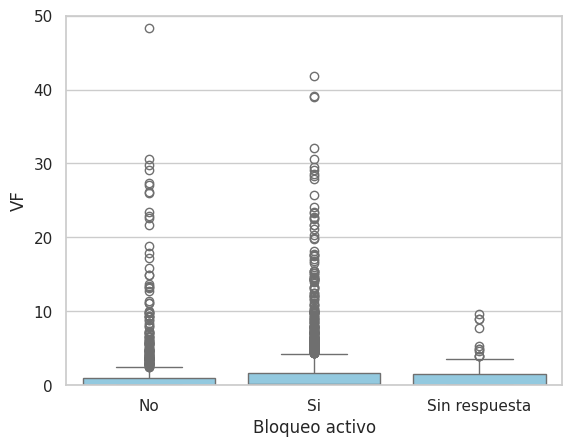

In [ ]:
#Grafico bivariado
plt.ylim([0,50])
ax = sns.boxplot(x="Bloqueo activo", y="VF", data=centinela, color='skyblue')

In [ ]:
# numero de colmenas evaluadas por defincion de bloqueo activo. Ver cantidad de colmenas con categoria "sin respuesta".
centinela[["VF", "Bloqueo activo"]].groupby("Bloqueo activo").count()

,VF
Bloqueo activo,
No,780
Si,1446
Sin respuesta,113


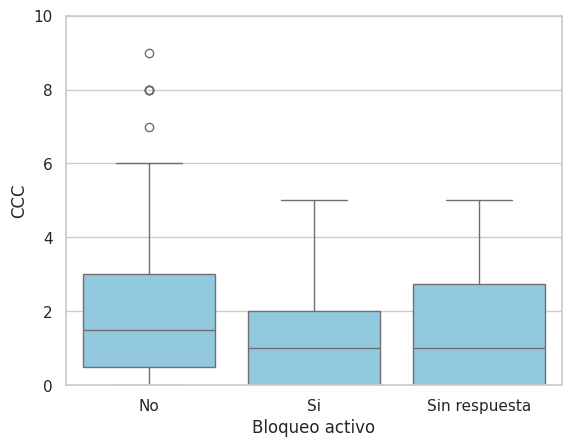

In [ ]:
# El bloque activo tiene como objetivo reducir la cantidad de cria en la etapa post tratamiento.
plt.ylim([0,10])
ax = sns.boxplot(x="Bloqueo activo", y="CCC", data=post, color='skyblue')
plt.savefig("VF por Bloqueo activo.jpg")


#### Se observa que quienes hacen bloqueo activo tienen menos niveles de Cria que podria impactar en los niveles de VF. Se elige esta variable para incluir en el modelo.

#### APIARIOS A 1.5 KM y CUANTOS HAY

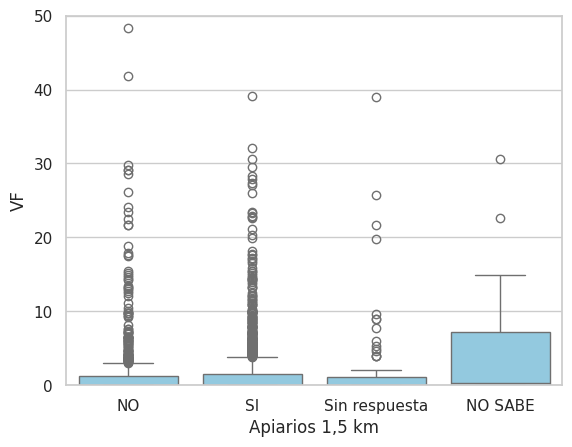

In [ ]:
#Grafico bivariado
plt.ylim([0,50])
ax = sns.boxplot(x="Apiarios 1,5 km", y="VF", data=centinela, color='skyblue')
plt.savefig("VF Apiarios a 1.5 km.jpg")

In [ ]:
# numero de colmenas evaluadas por lo que contestaron los apicultores sobre los apiarios que estan cerca. Ver cantidad de colmenas con categoria "sin respuesta" y "No sabe".
centinela[["VF", "Apiarios 1,5 km"]].groupby("Apiarios 1,5 km").count()

,VF
"Apiarios 1,5 km",
NO,754
NO SABE,18
SI,1471
Sin respuesta,96


In [ ]:
# bivariado correlacion entre cuantos apiarios hay cerca de las colmenas y VF
sns.scatterplot(data=centinela, x="Cuantos", y="VF", color='skyblue')

#### No se observa la relacion esperada. Es de esperar que aquellas colmenas que tienen mas apiarios cerca se infesten mas rapido. Sin embargo, debido a que la mayoria contesto que tiene uno o dos apiarios cerca, entonces resulta dificil encontrar una correlacion. Por otro lado el numero de apiarios es una variable cuantitativa discreta con pocos niveles entonces no se observa una tendencia. No se incluye esta variable.

#### APLICACIONES

In [ ]:
#grafico univariado
aplicaciones = centinela['Aplicaciones'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(aplicaciones, colors=plt.cm.Pastel2.colors, labels=aplicaciones.index)

plt.title('Distribución colmenas por percepcion de aplicaciones de pesticidas')

plt.show()

In [ ]:
#Grafico bivariado
plt.ylim([0,50])
ax = sns.boxplot(x="Aplicaciones", y="VF", data=centinela, color='skyblue')

####La mayoria de las colmenas tienen aplicaciones normales, no saben o no tienen respuesta. No se incluira esta variable en el modelo.

#### La produccion de miel y la mortalidad se registraron con el objetivo de saber el impacto de los niveles de VF. Por lo tanto no se incluiran el modelo como predictores.

## Eleccion de las features o predictores del modelo.

##### Se hace un subset de las columnas que se evaluaran en el modelo. En esta instancia se mantiene el target o variable de respuesta porque se quiere armar un dataset que sera la base para el modelado. Se arma un data set en base a las variables analizadas en el EDA.

In [ ]:
centinela_pred = centinela.drop(['Apiario','Año','ID', 'Fecha de muestreo','CCP','CCM','Suplemento E','Bloqueo','Bloqueo como', 'Cuantos','Aplicaciones', 'Producción', 'Mortalidad'],axis=1)


In [ ]:
centinela_pred

,Periodo,Zona,VF,CCA,CCC,Tratamiento otoño,Bloqueo activo,"Apiarios 1,5 km"
0,Pre,CENTRO,26.106195,8.0,6.0,OXÁLICO,No,NO
1,Pre,CENTRO,18.784530,8.0,7.0,OXÁLICO,No,NO
2,Pre,CENTRO,2.136752,7.0,5.0,OXÁLICO,No,NO
3,Pre,CENTRO,3.401361,7.0,5.0,OXÁLICO,No,NO
4,Pre,CENTRO,7.377049,9.0,6.0,OXÁLICO,No,NO
...,...,...,...,...,...,...,...,...
2334,IT,SUR,0.000000,8.5,3.0,AMITRAZ,No,NO
2335,IT,SUR,0.000000,9.0,2.0,AMITRAZ,No,NO
2336,IT,SUR,0.000000,9.0,2.5,AMITRAZ,No,NO
2337,IT,SUR,0.000000,8.0,4.0,AMITRAZ,No,NO


### Preprocesamiento de datos

In [ ]:
# Para codificar las variables categoricas. Uso One Hot Encoding.

In [ ]:
centinela_pred = pd.get_dummies(centinela_pred, columns=['Periodo'])

In [ ]:
centinela_pred = pd.get_dummies(centinela_pred, columns=['Zona'])

In [ ]:
centinela_pred = pd.get_dummies(centinela_pred, columns=['Tratamiento otoño'])

In [ ]:
centinela_pred = pd.get_dummies(centinela_pred, columns=['Bloqueo activo'])

In [ ]:
centinela_pred = pd.get_dummies(centinela_pred, columns=['Apiarios 1,5 km'])

In [ ]:
centinela_pred

In [ ]:
list(centinela_pred.columns.values.tolist())

#AVANCES PROVISORIOS PARA LA ENTREGA FINAL

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error



Modelo de arbol de decision para los predictores seleccionados.

In [ ]:
#Predictores: Periodo
X = centinela_pred.drop(['VF',
 'CCA',
 'CCC', 'Zona_CENTRO',
 'Zona_COSTA',
 'Zona_NORTE',
 'Zona_SUR',
 'Tratamiento otoño_AMITRAZ',
 'Tratamiento otoño_AMITRAZ CASERO',
 'Tratamiento otoño_FLUMETRINA',
 'Tratamiento otoño_FLUMETRINA CASERA',
 'Tratamiento otoño_FLUMETRINA+CASERO',
 'Tratamiento otoño_FLUMETRINA+OXA',
 'Tratamiento otoño_NO APLICO',
 'Tratamiento otoño_OXALICO CASERO',
 'Tratamiento otoño_OXALICO EN TIRAS',
 'Tratamiento otoño_OXÁLICO',
 'Tratamiento otoño_TIMOL',
 'Bloqueo activo_No',
 'Bloqueo activo_Si',
 'Bloqueo activo_Sin respuesta',
 'Apiarios 1,5 km_NO',
 'Apiarios 1,5 km_NO SABE',
 'Apiarios 1,5 km_SI',
 'Apiarios 1,5 km_Sin respuesta'],axis=1)
y = centinela_pred['VF']

In [ ]:
# chequear las variables que quedaron incluidas como predictores del modelo
X

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create a model object : Arbol de decision
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")
print(f"Error absoluto medio (MAE):{mae_tree} ")

In [ ]:
#Predictores: Periodo y zona

X = centinela_pred.drop(['VF',
 'CCA',
 'CCC', 'Tratamiento otoño_AMITRAZ',
 'Tratamiento otoño_AMITRAZ CASERO',
 'Tratamiento otoño_FLUMETRINA',
 'Tratamiento otoño_FLUMETRINA CASERA',
 'Tratamiento otoño_FLUMETRINA+CASERO',
 'Tratamiento otoño_FLUMETRINA+OXA',
 'Tratamiento otoño_NO APLICO',
 'Tratamiento otoño_OXALICO CASERO',
 'Tratamiento otoño_OXALICO EN TIRAS',
 'Tratamiento otoño_OXÁLICO',
 'Tratamiento otoño_TIMOL',
 'Bloqueo activo_No',
 'Bloqueo activo_Si',
 'Bloqueo activo_Sin respuesta',
 'Apiarios 1,5 km_NO',
 'Apiarios 1,5 km_NO SABE',
 'Apiarios 1,5 km_SI',
 'Apiarios 1,5 km_Sin respuesta'],axis=1)
y = centinela_pred['VF']

In [ ]:
# chequear las variables que quedaron incluidas como predictores del modelo
X

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create a model object : Arbol de decision
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")
print(f"Error absoluto medio (MAE):{mae_tree} ")

In [ ]:
#Predictores: Periodo, zona y Tratamiento
X = centinela_pred.drop(['VF',
 'CCA',
 'CCC','Bloqueo activo_No',
 'Bloqueo activo_Si',
 'Bloqueo activo_Sin respuesta',
 'Apiarios 1,5 km_NO',
 'Apiarios 1,5 km_NO SABE',
 'Apiarios 1,5 km_SI',
 'Apiarios 1,5 km_Sin respuesta'],axis=1)
y = centinela_pred['VF']

In [ ]:
# chequear las variables que quedaron incluidas como predictores del modelo
X

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create a model object : Arbol de decision
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")
print(f"Error absoluto medio (MAE):{mae_tree} ")

In [ ]:
#Predictores: Periodo, zona, Tratamiento, Bloqueo activo
X = centinela_pred.drop(['VF',
 'CCA',
 'CCC', 'Apiarios 1,5 km_NO',
 'Apiarios 1,5 km_NO SABE',
 'Apiarios 1,5 km_SI',
 'Apiarios 1,5 km_Sin respuesta'],axis=1)
y = centinela_pred['VF']

In [ ]:
# chequear las variables que quedaron incluidas como predictores del modelo
X

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create a model object : Arbol de decision
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")
print(f"Error absoluto medio (MAE):{mae_tree} ")

In [ ]:
#Predictores: Periodo, zona, Tratamiento, Bloqueo activo, Apiarios a 1,5 km
X = centinela_pred.drop(['VF',
 'CCA',
 'CCC'],axis=1)
y = centinela_pred['VF']

In [ ]:
# chequear las variables que quedaron incluidas como predictores del modelo
X

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create a model object : Arbol de decision
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")
print(f"Error absoluto medio (MAE):{mae_tree} ")

In [ ]:
#Predictores: Periodo, zona, Tratamiento, Bloqueo activo, Apiarios a 1,5 km, CCA
X = centinela_pred.drop(['VF',
  'CCC'],axis=1)
y = centinela_pred['VF']

In [ ]:
# chequear las variables que quedaron incluidas como predictores del modelo
X

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create a model object : Arbol de decision
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")
print(f"Error absoluto medio (MAE):{mae_tree} ")

In [ ]:
#Predictores: Periodo, zona, Tratamiento, Bloqueo activo, Apiarios a 1,5 km, CCA, CCC
X = centinela_pred.drop(['VF'],axis=1)
y = centinela_pred['VF']

In [ ]:
# chequear las variables que quedaron incluidas como predictores del modelo
X

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create a model object : Arbol de decision
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
mae_tree= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_tree}")
print(f"Coeficiente de Determinación (R^2): {r2_tree}")
print(f"Error absoluto medio (MAE):{mae_tree} ")

El mejor modelo utilizando el arbol decision es el que incluye como predictores: **Periodo, zona, Tratamiento, Bloqueo activo, Apiarios a 1,5 km**
Sin embargo las metricas del modelo no son buenas.  El ajuste del modelo solo explica el 26 % de la variabilidad de los datos. Por otro lado, el MSE de 18.4 sugiere que hay desvios grandes entre las predicciones del modelo y los valores de VF.


In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos del modelo de arbol de decision con mejores metricas
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Tree)')
plt.show()

##MODELO DE REGRESION LINEAL para la misma secuencia de predictores

In [ ]:
#Predictores: Periodo
X = centinela_pred.drop(['VF',
 'CCA',
 'CCC', 'Zona_CENTRO',
 'Zona_COSTA',
 'Zona_NORTE',
 'Zona_SUR',
 'Tratamiento otoño_AMITRAZ',
 'Tratamiento otoño_AMITRAZ CASERO',
 'Tratamiento otoño_FLUMETRINA',
 'Tratamiento otoño_FLUMETRINA CASERA',
 'Tratamiento otoño_FLUMETRINA+CASERO',
 'Tratamiento otoño_FLUMETRINA+OXA',
 'Tratamiento otoño_NO APLICO',
 'Tratamiento otoño_OXALICO CASERO',
 'Tratamiento otoño_OXALICO EN TIRAS',
 'Tratamiento otoño_OXÁLICO',
 'Tratamiento otoño_TIMOL',
 'Bloqueo activo_No',
 'Bloqueo activo_Si',
 'Bloqueo activo_Sin respuesta',
 'Apiarios 1,5 km_NO',
 'Apiarios 1,5 km_NO SABE',
 'Apiarios 1,5 km_SI',
 'Apiarios 1,5 km_Sin respuesta'],axis=1)
y = centinela_pred['VF']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a model object : regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
mae_lin= mean_absolute_error(y_test,y_pred)


print("*Metricas*:")
print(f"Error Cuadrático Medio (MSE): {mse_lin}")
print(f"Coeficiente de Determinación (R^2): {r2_lin}")
print(f"Error absoluto medio (MAE):{mae_lin} ")

In [ ]:
#Predictores: Periodo y zona

X = centinela_pred.drop(['VF',
 'CCA',
 'CCC', 'Tratamiento otoño_AMITRAZ',
 'Tratamiento otoño_AMITRAZ CASERO',
 'Tratamiento otoño_FLUMETRINA',
 'Tratamiento otoño_FLUMETRINA CASERA',
 'Tratamiento otoño_FLUMETRINA+CASERO',
 'Tratamiento otoño_FLUMETRINA+OXA',
 'Tratamiento otoño_NO APLICO',
 'Tratamiento otoño_OXALICO CASERO',
 'Tratamiento otoño_OXALICO EN TIRAS',
 'Tratamiento otoño_OXÁLICO',
 'Tratamiento otoño_TIMOL',
 'Bloqueo activo_No',
 'Bloqueo activo_Si',
 'Bloqueo activo_Sin respuesta',
 'Apiarios 1,5 km_NO',
 'Apiarios 1,5 km_NO SABE',
 'Apiarios 1,5 km_SI',
 'Apiarios 1,5 km_Sin respuesta'],axis=1)
y = centinela_pred['VF']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a model object : regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
mae_lin= mean_absolute_error(y_test,y_pred)


print("*Metricas")
print(f"Error Cuadrático Medio (MSE): {mse_lin}")
print(f"Coeficiente de Determinación (R^2): {r2_lin}")
print(f"Error absoluto medio (MAE):{mae_lin} ")

In [ ]:
#Predictores: Periodo, zona y Tratamiento
X = centinela_pred.drop(['VF',
 'CCA',
 'CCC','Bloqueo activo_No',
 'Bloqueo activo_Si',
 'Bloqueo activo_Sin respuesta',
 'Apiarios 1,5 km_NO',
 'Apiarios 1,5 km_NO SABE',
 'Apiarios 1,5 km_SI',
 'Apiarios 1,5 km_Sin respuesta'],axis=1)
y = centinela_pred['VF']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a model object : regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
mae_lin= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_lin}")
print(f"Coeficiente de Determinación (R^2): {r2_lin}")
print(f"Error absoluto medio (MAE):{mae_lin} ")

In [ ]:
#Predictores: Periodo, zona, Tratamiento, Bloqueo activo
X = centinela_pred.drop(['VF',
 'CCA',
 'CCC', 'Apiarios 1,5 km_NO',
 'Apiarios 1,5 km_NO SABE',
 'Apiarios 1,5 km_SI',
 'Apiarios 1,5 km_Sin respuesta'],axis=1)
y = centinela_pred['VF']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a model object : regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
mae_lin= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_lin}")
print(f"Coeficiente de Determinación (R^2): {r2_lin}")
print(f"Error absoluto medio (MAE):{mae_lin} ")

In [ ]:
#Predictores: Periodo, zona, Tratamiento, Bloqueo activo, Apiarios a 1,5 km
X = centinela_pred.drop(['VF',
 'CCA',
 'CCC'],axis=1)
y = centinela_pred['VF']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a model object : regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
mae_lin= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_lin}")
print(f"Coeficiente de Determinación (R^2): {r2_lin}")
print(f"Error absoluto medio (MAE):{mae_lin} ")

In [ ]:
#Predictores: Periodo, zona, Tratamiento, Bloqueo activo, Apiarios a 1,5 km, CCA
X = centinela_pred.drop(['VF',
  'CCC'],axis=1)
y = centinela_pred['VF']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a model object : regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
mae_lin= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_lin}")
print(f"Coeficiente de Determinación (R^2): {r2_lin}")
print(f"Error absoluto medio (MAE):{mae_lin} ")

In [ ]:
#Predictores: Periodo, zona, Tratamiento, Bloqueo activo, Apiarios a 1,5 km, CCA, CCC
X = centinela_pred.drop(['VF'],axis=1)
y = centinela_pred['VF']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a model object : regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)
mae_lin= mean_absolute_error(y_test,y_pred)


print("\nDecisionTreeRegressor:")
print(f"Error Cuadrático Medio (MSE): {mse_lin}")
print(f"Coeficiente de Determinación (R^2): {r2_lin}")
print(f"Error absoluto medio (MAE):{mae_lin} ")

El mejor modelo utilizando regresion lineal es el mismo que se eligio segun el arbol de decision: **Periodo, zona, Tratamiento, Bloqueo activo, Apiarios a 1,5 km **

Sin embargo las metricas del modelo no son buenas, al igual que el modelo anterior.

In [ ]:
# Gráfico de dispersión de valores reales vs. valores predichos del modelo de regresion lineal
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos (Lin)')
plt.show()

No se observan mejores metricas cuando se ajusta una regresion lineal en el modelo.

####En general para ambos casos, las metricas de los modelos propuestos sugieren que no hay un buen ajuste de los datos.

##### Se propone realizar el modelado:

1)Clasificar VF segun los niveles de umbral de daño economico, de modo tal de ver si los predictores explican las grandes diferencia entre las colmenas, y la alta variabilidad registrada en los  niveles de VF.

2)  Analizar los niveles de VF divididos por periodo y categorizados segun un umbral propio de cada periodo.

#Cambios en la variable de respuesta y subdivision del dataset por periodo.
### Categorizacion de la variable respuesta: VF_ cat.

In [ ]:
import math

In [ ]:
valores=[-math.inf,3,math.inf]

In [ ]:
categorias=["Under threshold","Above threshold"]

In [ ]:
centinela['VF_cat']=pd.cut(x=centinela['VF'], bins=valores, labels=categorias)

In [ ]:
centinela

In [ ]:
#grafico univariado
zona = centinela['VF_cat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(zona,colors=plt.cm.Pastel2.colors, labels=zona.index)

plt.title('Distribución colmenas por VF')

plt.show()

##Analisis Bivariados para predictores con la Variable de Respuesta categorizada.

###Para variables predictoras categoricas

In [ ]:
import scipy.stats as stats
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr, spearmanr, pointbiserialr, f_oneway

In [ ]:
# tamaño de la muestra
n = len(centinela)

In [ ]:
## Funcion para calcular V de Cramer
def corr_cat_cat(col1,col2):
  cont_table = pd.crosstab(index= centinela[col1],
                          columns= centinela[col2])
  X2 = stats.chi2_contingency(cont_table)[0]
  k=min(cont_table.shape)
  V = np.sqrt((X2/n) / (k-1))
  return V

##Zona

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= centinela['VF_cat'],
                         columns= centinela['Zona'])
cont_table

In [ ]:
## aplicar la funcion para Zona vs VF categorizada
corr_cat_cat('Zona','VF_cat')

## Periodo

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= centinela['VF_cat'],
                         columns= centinela['Periodo'])
cont_table

In [ ]:
## aplicar la funcion para Tratamiento vs VF categorizada
corr_cat_cat('VF_cat','Periodo')

## Tratamiento

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= centinela['VF_cat'],
                         columns= centinela['Tratamiento otoño'])
cont_table

In [ ]:
## aplicar la funcion para Tratamiento vs VF categorizada
corr_cat_cat('VF_cat','Tratamiento otoño')

## Bloqueo Activo

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= centinela['VF_cat'],
                         columns= centinela['Bloqueo activo'])
cont_table

In [ ]:
## aplicar la funcion para Bloqueo activo vs VF categorizada
corr_cat_cat('VF_cat','Bloqueo activo')

## Apiarios a 1.5 km

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= centinela['VF_cat'],
                         columns= centinela['Apiarios 1,5 km'])
cont_table

In [ ]:
## aplicar la funcion para Apiarios a 1.5 km vs VF categorizada
corr_cat_cat('VF_cat','Apiarios 1,5 km')

### Para variables predictoras cuantitativas

In [ ]:
# Asociacion entre variables cuantitativas y categoricas
# ANOVA para CCA
f_statistic, p_value = f_oneway(*[group['CCA'] for name, group in centinela.groupby('VF_cat')])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

In [ ]:
# ANOVA para CCC
f_statistic, p_value = f_oneway(*[group['CCC'] for name, group in centinela.groupby('VF_cat')])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

## Periodo: dividimos el data set para cada periodo y aplicamos los analisis bivariados para cada uno, usando el umbral propio en cada caso.

In [ ]:
## para pretratamiento
pre = centinela[(centinela['Periodo'] == "Pre")]
## para postratamiento
post = centinela[(centinela['Periodo'] == "Post")]
## para Inicio de temporada
IT = centinela[(centinela['Periodo'] == "IT")]


Usamos el umbral particular para cada periodo, en el caso del pre tratamiento es 3 % no se modifica VF_cat. Para el post se plantea el 1% y para el IT 2 %. En cada dataset (por periodo) se categoriza VF_cat 1 segun su propio valor.

## PRETRATAMIENTO

### Distribucion de la variable de respuesta categorizada para periodo PRE

In [ ]:
#grafico univariado
zona = pre['VF_cat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(zona,colors=plt.cm.Pastel2.colors, labels=zona.index)

plt.title('Distribución colmenas por VF')

plt.show()

###Para variables predictoras categoricas para el periodo PRE

---



In [ ]:
import scipy.stats as stats
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr, spearmanr, pointbiserialr, f_oneway

In [ ]:
# tamaño de la muestra
n = len(pre)

In [ ]:
## Funcion para calcular V de Cramer
def corr_cat_cat(col1,col2):
  cont_table = pd.crosstab(index= pre[col1],
                          columns= pre[col2])
  X2 = stats.chi2_contingency(cont_table)[0]
  k=min(cont_table.shape)
  V = np.sqrt((X2/n) / (k-1))
  return V

##Zona

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= pre['VF_cat'],
                         columns= pre['Zona'])
cont_table

In [ ]:
## aplicar la funcion para Zona vs VF categorizada
corr_cat_cat('Zona','VF_cat')

## Tratamiento

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= pre['VF_cat'],
                         columns= pre['Tratamiento otoño'])
cont_table

In [ ]:
## aplicar la funcion para Tratamiento vs VF categorizada
corr_cat_cat('VF_cat','Tratamiento otoño')

## Bloqueo Activo

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= pre['VF_cat'],
                         columns= pre['Bloqueo activo'])
cont_table

In [ ]:
## aplicar la funcion para Bloqueo activo vs VF categorizada
corr_cat_cat('VF_cat','Bloqueo activo')

## Apiarios a 1.5 km

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= pre['VF_cat'],
                         columns= pre['Apiarios 1,5 km'])
cont_table

In [ ]:
## aplicar la funcion para Apiarios a 1.5 km vs VF categorizada
corr_cat_cat('VF_cat','Apiarios 1,5 km')

### Para variables predictoras cuantitativas para el periodo PRE

In [ ]:
# Asociacion entre variables cuantitativas y categoricas
# ANOVA para CCA
f_statistic, p_value = f_oneway(*[group['CCA'] for name, group in pre.groupby('VF_cat')])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

In [ ]:
# ANOVA para CCC
f_statistic, p_value = f_oneway(*[group['CCC'] for name, group in pre.groupby('VF_cat')])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

##POSTRATAMIENTO

### Distribucion de la variable de respuesta categorizada para periodo POST

In [ ]:
#grafico univariado
zona = post['VF_cat_1'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(zona,colors=plt.cm.Pastel2.colors, labels=zona.index)

plt.title('Distribución colmenas por VF')

plt.show()

###Para variables predictoras categoricas para el periodo POST

---



In [ ]:
# umbral para el post 1%
valores=[-math.inf,1,math.inf]

In [ ]:
categorias=["Under threshold","Above threshold"]

In [ ]:
post['VF_cat_1']=pd.cut(x=post['VF'], bins=valores, labels=categorias)

In [ ]:
# chequeo el umbral
post

In [ ]:
import scipy.stats as stats
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr, spearmanr, pointbiserialr, f_oneway

In [ ]:
# tamaño de la muestra
n = len(post)

In [ ]:
## Funcion para calcular V de Cramer
def corr_cat_cat(col1,col2):
  cont_table = pd.crosstab(index= post[col1],
                          columns= post[col2])
  X2 = stats.chi2_contingency(cont_table)[0]
  k=min(cont_table.shape)
  V = np.sqrt((X2/n) / (k-1))
  return V

##Zona

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= post['VF_cat_1'],
                         columns= post['Zona'])
cont_table

In [ ]:
## aplicar la funcion para Zona vs VF categorizada
corr_cat_cat('Zona','VF_cat_1')

## Tratamiento

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= post['VF_cat_1'],
                         columns= post['Tratamiento otoño'])
cont_table

In [ ]:
## aplicar la funcion para Tratamiento vs VF categorizada
corr_cat_cat('VF_cat_1','Tratamiento otoño')

## Bloqueo Activo

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= post['VF_cat_1'],
                         columns= post['Bloqueo activo'])
cont_table

In [ ]:
## aplicar la funcion para Bloqueo activo vs VF categorizada
corr_cat_cat('VF_cat_1','Bloqueo activo')

## Apiarios a 1.5 km

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= post['VF_cat_1'],
                         columns= post['Apiarios 1,5 km'])
cont_table

In [ ]:
## aplicar la funcion para Apiarios a 1.5 km vs VF categorizada
corr_cat_cat('VF_cat_1','Apiarios 1,5 km')

### Para variables predictoras cuantitativas para el periodo POST

In [ ]:
# Asociacion entre variables cuantitativas y categoricas
# ANOVA para CCA
f_statistic, p_value = f_oneway(*[group['CCA'] for name, group in post.groupby('VF_cat_1')])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

In [ ]:
# ANOVA para CCC
f_statistic, p_value = f_oneway(*[group['CCC'] for name, group in post.groupby('VF_cat_1')])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

## INICIO DE TEMPORADA

### Distribucion de la variable de respuesta categorizada para periodo POST

In [ ]:
#grafico univariado
zona = IT['VF_cat_1'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(zona,colors=plt.cm.Pastel2.colors, labels=zona.index)

plt.title('Distribución colmenas por VF')

plt.show()

###Para variables predictoras categoricas para el periodo IT

---



In [ ]:
# umbral para IT 2%
valores=[-math.inf,2,math.inf]

In [ ]:
categorias=["Under threshold","Above threshold"]

In [ ]:
IT['VF_cat_1']=pd.cut(x=IT['VF'], bins=valores, labels=categorias)

In [ ]:
# chequeo el umbral
IT

In [ ]:
import scipy.stats as stats
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr, spearmanr, pointbiserialr, f_oneway

In [ ]:
# tamaño de la muestra
n = len(IT)

In [ ]:
## Funcion para calcular V de Cramer
def corr_cat_cat(col1,col2):
  cont_table = pd.crosstab(index= IT[col1],
                          columns= IT[col2])
  X2 = stats.chi2_contingency(cont_table)[0]
  k=min(cont_table.shape)
  V = np.sqrt((X2/n) / (k-1))
  return V

##Zona

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= IT['VF_cat_1'],
                         columns= IT['Zona'])
cont_table

In [ ]:
## aplicar la funcion para Zona vs VF categorizada
corr_cat_cat('Zona','VF_cat_1')

## Tratamiento

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= IT['VF_cat_1'],
                         columns= IT['Tratamiento otoño'])
cont_table

In [ ]:
## aplicar la funcion para Tratamiento vs VF categorizada
corr_cat_cat('VF_cat_1','Tratamiento otoño')

## Bloqueo Activo

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= IT['VF_cat_1'],
                         columns= IT['Bloqueo activo'])
cont_table

In [ ]:
## aplicar la funcion para Bloqueo activo vs VF categorizada
corr_cat_cat('VF_cat_1','Bloqueo activo')

## Apiarios a 1.5 km

In [ ]:
#tabla de contigencia
cont_table = pd.crosstab(index= IT['VF_cat_1'],
                         columns= IT['Apiarios 1,5 km'])
cont_table

In [ ]:
## aplicar la funcion para Apiarios a 1.5 km vs VF categorizada
corr_cat_cat('VF_cat_1','Apiarios 1,5 km')

### Para variables predictoras cuantitativas para el periodo IT

In [ ]:
# Asociacion entre variables cuantitativas y categoricas
# ANOVA para CCA
f_statistic, p_value = f_oneway(*[group['CCA'] for name, group in IT.groupby('VF_cat_1')])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

In [ ]:
# ANOVA para CCC
f_statistic, p_value = f_oneway(*[group['CCC'] for name, group in IT.groupby('VF_cat_1')])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

## Conclusiones sobre los cambios implementados y potenciales predictores de un modelo de clasificacion.

#####1) Las asociaciones mejoraron utilizando la variable categorizada segun su umbral de daño economico. Desde el punto de vista del proyecto, resulta conveniente utilizar esta variable ya que nos permite identificar los factores de riesgo asociados a la probabilidad de que ocurran niveles de infestacion superiores a los umbrales de daño en cada momento.

#####2) Las asociaciones mejoraron utilizando la variable categorizada dividida para cada periodo segun su umbral de daño economico. Desde el punto de vista del proyecto, resulta conveniente clasificar las colmenas con base en los niveles esperados en cada momento. Especialmente las cargas de infestacion y la distribucion de la variable son claramente diferentes en el periodo pre-tratamiento comparado con el post-tratamiento y el inicio de temporada.  



1) Las asociaciones mejoraron utilizando la variable categorizada segun su umbral de daño economico. Desde el punto de vista del proyecto, resulta conveniente utilizar esta variable ya que nos permite identificar los factores de riesgo asociados a la probabilidad de que ocurran niveles de infestacion superiores a los umbrales de daño en cada momento.

2) Las asociaciones mejoraron utilizando la variable categorizada dividida para cada periodo segun su umbral de daño economico. Desde el punto de vista del proyecto, resulta conveniente clasificar las colmenas con base en los niveles esperados en cada momento. Especialmente las cargas de infestacion y la distribucion de la variable son claramente diferentes en el periodo pre-tratamiento comparado con el post-tratamiento y el inicio de temporada.  
